[*********************100%***********************]  4 of 4 completed
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


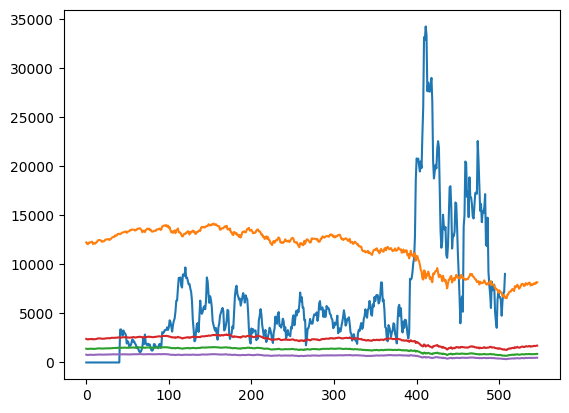

In [58]:
from ripser import Rips
import persim
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
ilist=['^GSPC','^DJI','^IXIC','^RUT'] #The tickers of well-known stock indexes.
startt='2007-03-01'#Input desired start and ending dates, if end is in the future or start is beyond yfinance's
#library, an error will be thrown
endt='2009-05-01'
first=yf.download(index, start=startt, end=endt)
data_close = first['Adj Close'].dropna(axis='columns') #Get the data for those tickers and times and look at adjusted 
#closing prices
numdata=data_close.to_numpy()
logs=np.log(np.divide(numdata[1:],numdata[:len(numdata)-1])) #Convert to NumPy array and calculate daily log returns
rips=Rips(maxdim = 2)
w=20 #suggested parameters in da Oliveira
n=len(first)-(2*w)+1
wasserstein=np.zeros((n,1))
for i in range((2*w)+1,n): #For each day, calculate complexes for previous w days and previous w days before that
#the Wasserstein distamce between those complexes. Here we differ from da Olieveira's suggestion by exclusively
#using data from the past, to test its predictive power
    diagram1 = rips.fit_transform(logs[i-w:i])
    diagram2 = rips.fit_transform(logs[i-(2*w)-1:i-w-1])
    wasserstein[i]=persim.wasserstein(diagram1[0],diagram2[0], matching=False)

for i in range(len(wasserstein)): #Scale Wasserstein distance so it's visible
    wasserstein[i]=100000*wasserstein[i]
plt.plot(wasserstein) #Plot the indexes and the Wasserstein distance, where X axis is in days and Y is in dollars
#(as is the Wasserstein distance, but scaled by a factor of 100000)
plt.plot(numdata)

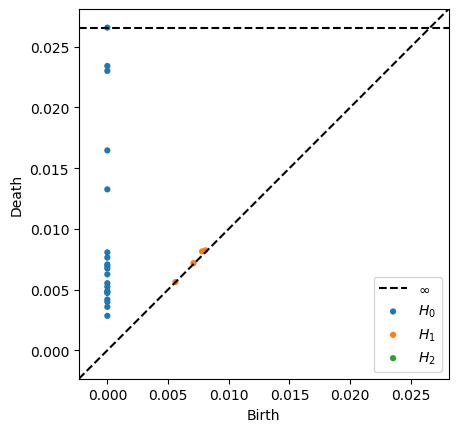

In [59]:
example_diagram=rips.fit_transform(logs[int(len(logs)/2):int(len(logs)/2)+w])

rips.plot(example_diagram)